In [1]:
import pandas as pd
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import mlab

In [2]:
df = pd.read_csv("../data/creditcard_fraud_subsample.csv", sep = ';')
df = df.drop(['Time'], axis=1)
df['Amount_norm'] = (df.Amount-df.Amount.mean())/df.Amount.std()
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_norm
0,-1.836940,-1.646764,-3.381168,0.473354,0.074243,-0.446751,3.791907,-1.351045,0.095186,-0.084500,...,1.786681,-0.151178,-0.582098,-0.956062,-0.334369,0.715600,0.370450,720.80,1,2.625216
1,1.140431,1.134243,-1.429455,2.012226,0.622800,-1.152923,0.221159,0.037372,0.034486,-1.879644,...,-0.891627,-0.160578,-0.108326,0.668374,-0.352393,0.071993,0.113684,1.00,1,-0.360630
2,-1.125092,3.682876,-6.556168,4.016731,-0.425571,-2.031210,-2.650137,1.131249,-2.946890,-4.816401,...,1.348156,-0.053686,0.284122,-1.174469,-0.087832,0.718790,0.676216,0.76,1,-0.361625
3,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,0.128119,-0.552903,...,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136,1.00,1,-0.360630
4,-7.381547,-7.449015,-4.696287,3.728439,6.198304,-6.406267,-5.831452,1.457175,-0.646203,-4.029129,...,-0.978692,-0.278330,-0.635874,0.123539,0.404729,0.704915,-1.229992,35.00,1,-0.219592


In [3]:
def train_test_fn(df , proportion):

    msk = np.random.rand(len(df)) < proportion

    train = df[msk]

    test = df[~msk]
    
    return train, test

In [4]:
def frange(start, stop, step):
     i = start
     while i < stop:
         yield i
         i += step

In [5]:
train, test = train_test_fn(df , 0.6)

In [6]:
X = train.drop(['Amount','Class'], axis=1)
y = train['Class']

X_test = test.drop(['Amount','Class'], axis=1)
y_test = test['Class']

In [7]:
supvecma = svm.SVC(kernel = 'linear', C = 2)
SVM_model = supvecma.fit(X, y)
print('Accuracy:', np.mean(np.equal(SVM_model.predict(X_test),y_test)))

Accuracy: 0.998607519395


In [ ]:
accuracies = []

proportion = 0.1
iterations = 1000

for i in range(iterations-1):
    train, test = train_test_fn(df, proportion) 
    X = train.drop(['Amount','Class'], axis=1)
    y = train['Class']
    
    supvecma = svm.SVC(kernel = 'linear', C = 2)
    SVM_model = supvecma.fit(X, y)
    

    accuracies.append(np.mean(np.equal(SVM_model.predict(X_test),y_test))) 

In [ ]:
plt.figure(1,figsize=(15,5))
plt.hist(accuracies , normed = 1)
mu = np.mean(accuracies)
sigma = np.std(accuracies)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma) , color="black")
plt.title("accuracies histogram and normal distribution")
plt.xlabel("accuracy")
plt.ylabel("frequency")
plt.show()

In [8]:
accuracies = []
proportions = []

proportion = 0.1
iterations = 3

for proportion in frange(0.05,0.9,0.05):

    for i in range(iterations-1):
        train, test = train_test_fn(df, proportion) 
        X = train.drop(['Amount','Class'], axis=1)
        y = train['Class']
    
        supvecma = svm.SVC(kernel = 'linear', C = 2)
        SVM_model = supvecma.fit(X, y)
    
        #coeffs = coeffs.append(pd.DataFrame(logistic_model.coef_, columns=cols))
        accuracies.append(np.mean(np.equal(SVM_model.predict(X_test),y_test))) 
        proportions.append(proportion)

qualities = pd.DataFrame(list(zip(proportions,accuracies)), columns=['proportions','accuracies'])

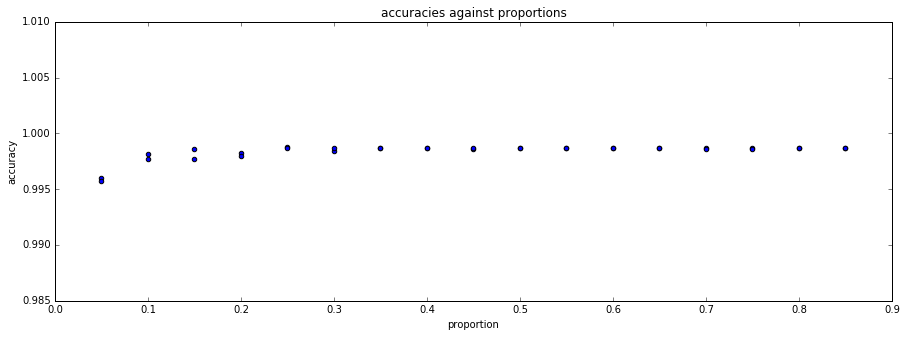

In [9]:
plt.figure(1,figsize=(15,5))
plt.scatter(qualities.proportions, qualities.accuracies)
plt.title("accuracies against proportions")
plt.xlabel("proportion")
plt.ylabel("accuracy")
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

all_data = [qualities[qualities.proportions == prop]['accuracies'] for prop in frange(0.05,0.9,0.05)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('Violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))])
    ax.set_xlabel('proportions')
    ax.set_ylabel('accuracy')

# add x-tick labels
plt.setp(axes, xticks=[y + 1 for y in range(len(all_data))]) #,
         #xticklabels=['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy import integrate

def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)

    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index('index', drop=True)

    print(y_cap_df_s.head(20))

    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0

    percent = 0.5
    row_index = np.trunc(num_count * percent)

    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)

    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)

    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    #ar_label = 'ar value = %s' % ar_value

    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    #ax.scatter(xx,yy, color='red')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')

    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    plt.show()

In [ ]:
y_pred_proba = supvecma.predict_proba(X=X_test)
capcurve(y_values=y_test, y_preds_proba=y_pred_proba[:,1])